<a href="https://colab.research.google.com/github/kartikeyaGUPTA45/KAPUR-S-ENTROPY/blob/master/KAPUR'S_ENTROPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KAPUR'S ENTROPY


IMPORTING THE LIBRARIES


In [0]:

import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image



READ AN IMAGE AND CONVERT INTO GREYSCALE


In [2]:

image = Image.open('lena.tiff').convert("L")
print(image)



<PIL.Image.Image image mode=L size=512x512 at 0x7EFD1295C550>


DEFINING THE THRESHOLD VALUES


In [0]:
thresholds=[63,94,128,163,194]
thresholds.append(256)
thresholds.insert(0,0)

CONVERT IMAGE INTO ARRAY

In [4]:
img = np.asarray(image)#Convert given input into array
print(img)

[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]



MAKING HISTOGRAM

In [0]:
def Hist(img):
    row, col = img.shape 
    y = np.zeros(256,dtype=float)
    for i in range(0,row):
        for j in range(0,col):
             y[img[i,j]] += 1
    x = np.arange(0,256)
    plt.bar(x, y, color='b', width=5, align='edge', alpha=0.25)
    plt.show()
    return y

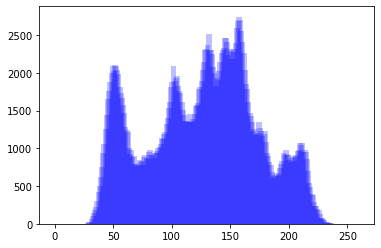

In [6]:
h=Hist(img)

COUNTING PIXELS

In [7]:
cnt = 0
for i in range(0, len(h)):
    if h[i]>0:
           cnt += h[i]
            
print(cnt)

262144.0


FINDING PROBABILITY OF AN INDIVIDUAL PIXEL

In [0]:
prob=[]
for i in range (len(h)):
    h[i]=h[i]/cnt
    prob.append(h[i])

KAPUR'S ENTROPY CALCULATION

In [0]:
w0=prob[:]

In [10]:
SUM=[]
for i in range(len(thresholds)-1):
    SUM.append(sum(h[thresholds[i]:thresholds[i+1]]))
    
print(SUM)

[0.15855026245117188, 0.1113739013671875, 0.21905899047851562, 0.303192138671875, 0.1210174560546875, 0.0868072509765625]


In [11]:
print(w0[63])
print(w0[94])
print(w0[128])
print(w0[163])
print(w0[194])

0.003719329833984375
0.005340576171875
0.009052276611328125
0.006153106689453125
0.003452301025390625


In [0]:
for i in range(0,w0.index(0.003719329833984375)):
    w0[i]=w0[i]/SUM[0]

In [0]:
for i in range(w0.index(0.003719329833984375),w0.index(0.005340576171875)):
    w0[i]=w0[i]/SUM[1]


In [0]:
for i in range(w0.index(0.005340576171875),w0.index(0.009052276611328125)):
    w0[i]=w0[i]/SUM[2]


In [0]:
for i in range(w0.index(0.009052276611328125),w0.index(0.006153106689453125)):
    w0[i]=w0[i]/SUM[3]


In [0]:
for i in range(w0.index(0.006153106689453125),w0.index(0.003452301025390625)):
    w0[i]=w0[i]/SUM[4]


In [0]:
for i in range(w0.index(0.003452301025390625),256):
    w0[i]=w0[i]/SUM[5]


In [0]:
w1=prob[:]

In [0]:
for i in range(0,w1.index(0.003719329833984375)):
    if w1[i]==0:
        w1[i]=w1[i]
    else:
        w1[i]=math.log(w1[i]/SUM[0])

In [0]:
for i in range(w1.index(0.003719329833984375),w1.index(0.005340576171875)):
    if w1[i]==0:
        w1[i]=w1[i]
    else:
        w1[i]=math.log(w1[i]/SUM[1])

In [0]:
for i in range(w1.index(0.005340576171875),w1.index(0.009052276611328125)):
    if w1[i]==0:
        w1[i]=w1[i]
    else:
        w1[i]=math.log(w1[i]/SUM[2])

In [0]:
for i in range(w1.index(0.009052276611328125),w1.index(0.006153106689453125)):
    if w1[i]==0:
        w1[i]=w1[i]
    else:
        w1[i]=math.log(w1[i]/SUM[3])

In [0]:
for i in range(w1.index(0.006153106689453125),w1.index(0.003452301025390625)):
    if w1[i]==0:
        w1[i]=w1[i]
    else:
        w1[i]=math.log(w1[i]/SUM[4])

In [0]:
for i in range(w1.index(0.003452301025390625),256):
    if w1[i]==0:
        w1[i]=w1[i]
    else:
        w1[i]=math.log(w1[i]/SUM[5])

In [25]:
mul=[]
for i in range(len(w0)):
    mul.append(w0[i]*w1[i])
    
print(mul)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00025587579403317946, -0.001463402265197894, -0.0035156270316497205, -0.005070914614561565, -0.009308477800597256, -0.014143461755481377, -0.018837737990893076, -0.023781597265332435, -0.027845281779953466, -0.03549845040418389, -0.046603066483171106, -0.053094276310495146, -0.062266727843078976, -0.07302759519892857, -0.08596319927399913, -0.09357067407820946, -0.10568519701833642, -0.11655701076076277, -0.1279783405216974, -0.133891632203863, -0.14023877045802155, -0.14590037314555473, -0.15035480428034928, -0.14712070934826527, -0.1508807916342476, -0.1502590207755957, -0.14746106747326623, -0.1449186896976146, -0.13637274182084158, -0.13232499737850822, -0.12904737035816838, -0.12413562268774449, -0.1181416450894473, -0.10706364031394332, -0.10453884144257834, -0.10356804314900167, -0.08987290339863387, -0.085022649191973, -0.11352122837150068, -0.1055501

In [26]:
kapur_entropy=[]
for i in range(len(thresholds)-1):
    kapur_entropy.append(-(sum(mul[thresholds[i]:thresholds[i+1]])))
    
print(kapur_entropy)

[3.345581228038181, 3.4240211096788977, 3.5127515230735953, 3.5494884424851736, 3.3937417883559053, 3.3838359314144015]


OBJECTIVE FUNCTION CALCULATION

In [28]:
J=sum(kapur_entropy)
print(J)

20.609420023046155
